# Titanic Notebook - IA Neurals!

![Titanic Logo](assets/titanic.jpeg)

#### Created by: Lucas Moutinho! [Siga meu Github!](https://github.com/lucasmoutinho)

Aula focada em exploração, visualização e pré-processamento de dados utilizando do [dataset de desafio temático do Titanic para iniciantes na plataforma Kaggle](https://www.kaggle.com/c/titanic/data)



In [1]:
# Definindo funções de base ----------------

# Modelo de regressão logística encapsulado (não é o foco da aula)
def run_model(X, y):
    
    # Train and Test Split
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3)
    print("Training on: ", X_train.count()[0], " samples")
    print("Test on: ", X_test.count()[0], " samples")
    space()
    
    #-----------------------Logistic Regression---------------------------------------------
    from sklearn.linear_model import LogisticRegression
    classifier = LogisticRegression()
    classifier.fit(X_train,y_train)
    
    # Testing Data
    predictions = classifier.predict(X_test)
    
    # Evaluating score
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import classification_report
    print("Test Accuracy score: ",accuracy_score(y_test,predictions))
    print("Classification report: ")
    print(classification_report(y_test,predictions))
    space()
    
    # Plotting confusion-matrix
    from sklearn.metrics import plot_confusion_matrix
    plot_confusion_matrix(classifier, X_test, y_test, cmap=plt.cm.Blues)
    plt.show()


def space():
    print("------------")
    print()

## Explorando o dataset e os dados
#### Importando bibliotecas padrão

In [2]:
# Importando bibliotecas padrão

import numpy as np # Valores numéricos
import matplotlib.pyplot as plt # Visualização
import pandas as pd # Dataframes


# Coisas pra visualização ficar bunitinha (não precisa esquentar com isso)
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import seaborn
seaborn.set() 

#### Criando dataframes a partir da leitura dos datasets

In [3]:
df_train = pd.read_csv("data/train.csv")
df_test = pd.read_csv("data/train.csv")
df = pd.concat([df_train, df_test], axis = 0, ignore_index=True)

#### Analisando características gerais do dataset

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1782 entries, 0 to 1781
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1782 non-null   int64  
 1   Survived     1782 non-null   int64  
 2   Pclass       1782 non-null   int64  
 3   Name         1782 non-null   object 
 4   Sex          1782 non-null   object 
 5   Age          1428 non-null   float64
 6   SibSp        1782 non-null   int64  
 7   Parch        1782 non-null   int64  
 8   Ticket       1782 non-null   object 
 9   Fare         1782 non-null   float64
 10  Cabin        408 non-null    object 
 11  Embarked     1778 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 167.2+ KB


In [6]:
pd.isnull(df).any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

#### Explorando os dados

In [7]:
survivor_count = df.groupby('Survived').count()['PassengerId']
survivor_count

Survived
0    1098
1     684
Name: PassengerId, dtype: int64

In [8]:
sex_count = df.groupby('Sex').count()['PassengerId']
sex_count

Sex
female     628
male      1154
Name: PassengerId, dtype: int64

In [9]:
sex_count = df.groupby('Pclass').count()['PassengerId']
sex_count

Pclass
1    432
2    368
3    982
Name: PassengerId, dtype: int64

In [10]:
survivor_sex_count = df.groupby(['Survived', 'Sex']).count()['PassengerId']
survivor_sex_count

Survived  Sex   
0         female    162
          male      936
1         female    466
          male      218
Name: PassengerId, dtype: int64

In [11]:
survivor_class_count = df.groupby(['Survived', 'Pclass']).count()['PassengerId']
survivor_class_count

Survived  Pclass
0         1         160
          2         194
          3         744
1         1         272
          2         174
          3         238
Name: PassengerId, dtype: int64

In [12]:
survivor_age = df.groupby('Survived').mean()['Age']
survivor_age

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

In [13]:
df['Age'].isna().sum()

354

In [14]:
sex_age = df.groupby(['Survived', 'Sex']).mean()['Age']
sex_age

Survived  Sex   
0         female    25.046875
          male      31.618056
1         female    28.847716
          male      27.276022
Name: Age, dtype: float64

In [15]:
female_died_age_mean = sex_age.iloc[0]
male_died_age_mean = sex_age.iloc[1]
female_survived_age_mean = sex_age.iloc[2]
male_survived_age_mean = sex_age.iloc[3]
female_died_age_mean, male_died_age_mean

(25.046875, 31.618055555555557)

In [16]:
embarked_count = df.groupby('Embarked').count()['PassengerId']
embarked_count

Embarked
C     336
Q     154
S    1288
Name: PassengerId, dtype: int64

In [17]:
df['Embarked'].isna().sum()

4

In [18]:
cabin_count = df.groupby('Cabin').count()['PassengerId'].sort_values()
cabin_count

Cabin
A10            2
D30            2
D28            2
D21            2
D19            2
              ..
C22 C26        6
F2             6
C23 C25 C27    8
G6             8
B96 B98        8
Name: PassengerId, Length: 147, dtype: int64

In [19]:
df['Cabin'].isna().sum()

1374

#### Visualizando os dados

In [20]:
survived_class = df[df['Survived']==1]
survived_class

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
1766,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
1770,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
1771,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
1778,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [21]:
survived_class = df[df['Survived']==1]['Pclass'].value_counts()
survived_class

1    272
3    238
2    174
Name: Pclass, dtype: int64

In [22]:
dead_class = df[df['Survived']==0]['Pclass'].value_counts()
dead_class

3    744
2    194
1    160
Name: Pclass, dtype: int64

In [23]:
df_class = pd.DataFrame([survived_class,dead_class])
df_class

,1,2,3
Pclass,272,174,238
Pclass,160,194,744


In [24]:
# Visuzlization Code by RochelleSilve: https://www.kaggle.com/rochellesilva/simple-tutorial-for-beginners

# Visualizando em tabela

df_class.index = ['Survived','Died']
df_class

,1,2,3
Survived,272,174,238
Died,160,194,744


In [25]:
# Visualizando em porcentagens

#-------------------Survived/Died by Class -------------------------------------
Class1_survived= df_class.iloc[0,0]/df_class.iloc[:,0].sum()*100
Class2_survived = df_class.iloc[0,1]/df_class.iloc[:,1].sum()*100
Class3_survived = df_class.iloc[0,2]/df_class.iloc[:,2].sum()*100
print("Percentage of Class 1 that survived:" ,round(Class1_survived),"%")
print("Percentage of Class 2 that survived:" ,round(Class2_survived), "%")
print("Percentage of Class 3 that survived:" ,round(Class3_survived), "%")

Percentage of Class 1 that survived: 63.0 %
Percentage of Class 2 that survived: 47.0 %
Percentage of Class 3 that survived: 24.0 %


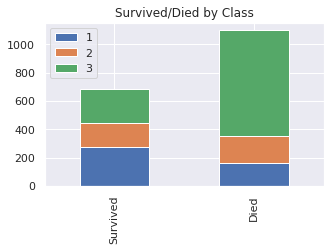

In [26]:
# Visualizando em gráficos

df_class.plot(kind='bar',stacked=True, figsize=(5,3), title="Survived/Died by Class")

#### Visualizando outros dados

Percentage of female that survived: 74.0 %
Percentage of male that survived: 19.0 %


,female,male
Survived,466,218
Died,162,936


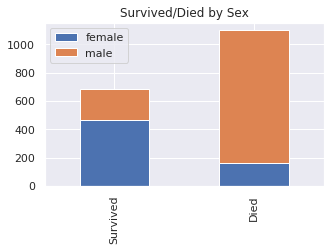

In [27]:
#-------------------Survived/Died by SEX------------------------------------
   
Survived = df[df.Survived == 1]['Sex'].value_counts()
Died = df[df.Survived == 0]['Sex'].value_counts()
df_sex = pd.DataFrame([Survived , Died])
df_sex.index = ['Survived','Died']
df_sex.plot(kind='bar',stacked=True, figsize=(5,3), title="Survived/Died by Sex")


female_survived= df_sex.female[0]/df_sex.female.sum()*100
male_survived = df_sex.male[0]/df_sex.male.sum()*100
print("Percentage of female that survived:" ,round(female_survived), "%")
print("Percentage of male that survived:" ,round(male_survived), "%")

# display table
from IPython.display import display
display(df_sex) 

Percentage of Embark S that survived: 34.0 %
Percentage of Embark C that survived: 55.0 %
Percentage of Embark Q that survived: 39.0 %


,S,C,Q
Survived,434,186,60
Died,854,150,94


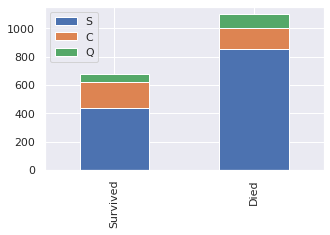

In [28]:
#-------------------- Survived/Died by Embarked ----------------------------

survived_embark = df[df['Survived']==1]['Embarked'].value_counts()
dead_embark = df[df['Survived']==0]['Embarked'].value_counts()
df_embark = pd.DataFrame([survived_embark,dead_embark])
df_embark.index = ['Survived','Died']
df_embark.plot(kind='bar',stacked=True, figsize=(5,3))

Embark_S= df_embark.iloc[0,0]/df_embark.iloc[:,0].sum()*100
Embark_C = df_embark.iloc[0,1]/df_embark.iloc[:,1].sum()*100
Embark_Q = df_embark.iloc[0,2]/df_embark.iloc[:,2].sum()*100
print("Percentage of Embark S that survived:", round(Embark_S), "%")
print("Percentage of Embark C that survived:" ,round(Embark_C), "%")
print("Percentage of Embark Q that survived:" ,round(Embark_Q), "%")

from IPython.display import display
display(df_embark)

## Preparando os dados: Abordagem simples - Dropar missing values
#### Selecionando features

In [29]:
df_selected = df.drop(['PassengerId','Cabin','Ticket','Fare', 'Parch', 'SibSp', 'Name'], axis=1)
df_selected.head()

,Survived,Pclass,Sex,Age,Embarked
0,0,3,male,22.0,S
1,1,1,female,38.0,C
2,1,3,female,26.0,S
3,1,1,female,35.0,S
4,0,3,male,35.0,S


In [30]:
# encode "Sex"
from sklearn.preprocessing import LabelEncoder
labelEncoder_X = LabelEncoder()
df_selected.Sex=labelEncoder_X.fit_transform(df_selected.Sex)

df_selected.head()

,Survived,Pclass,Sex,Age,Embarked
0,0,3,1,22.0,S
1,1,1,0,38.0,C
2,1,3,0,26.0,S
3,1,1,0,35.0,S
4,0,3,1,35.0,S


In [31]:
# Remove NAN from Embarked
df_selected = df_selected.dropna(subset=['Embarked'])

df_selected['Embarked'].isna().sum()

0

In [32]:
# encode "Embarked"
df_selected.Embarked=labelEncoder_X.fit_transform(df_selected.Embarked)
df_selected.head()

,Survived,Pclass,Sex,Age,Embarked
0,0,3,1,22.0,2
1,1,1,0,38.0,0
2,1,3,0,26.0,2
3,1,1,0,35.0,2
4,0,3,1,35.0,2


In [33]:
# Remove NAN from Age
df_selected = df_selected.dropna(subset=['Age'])

df_selected['Age'].isna().sum()

0

#### Selecionando Target

In [34]:
X = df_selected.drop(['Survived'], axis=1)
y = df_selected.Survived                       # Vetor de Labels (Variável dependente - classificacão)

In [35]:
X.head()

,Pclass,Sex,Age,Embarked
0,3,1,22.0,2
1,1,0,38.0,0
2,3,0,26.0,2
3,1,0,35.0,2
4,3,1,35.0,2


In [36]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1424 entries, 0 to 1781
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1424 non-null   int64  
 1   Sex       1424 non-null   int64  
 2   Age       1424 non-null   float64
 3   Embarked  1424 non-null   int64  
dtypes: float64(1), int64(3)
memory usage: 55.6 KB


In [37]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [38]:
y.count()

1424

#### Rodando modelo com X e y

Training on:  996  samples
Test on:  428  samples
------------

Test Accuracy score:  0.780373831775701
Classification report: 
              precision    recall  f1-score   support

           0       0.79      0.84      0.82       248
           1       0.76      0.69      0.73       180

    accuracy                           0.78       428
   macro avg       0.78      0.77      0.77       428
weighted avg       0.78      0.78      0.78       428

------------



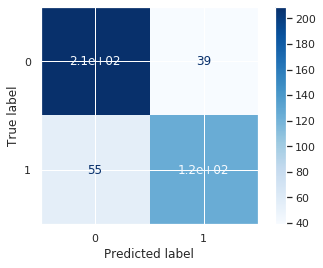

In [39]:
run_model(X,y)

#### Rodando modelo com X e y

## Preparando os dados: Preencher idade com média de cada sexo
#### Fluxo padrão

In [40]:
df_selected = df.drop(['PassengerId','Cabin','Ticket','Fare', 'Parch', 'SibSp', 'Name'], axis=1)

# encode "Sex"
from sklearn.preprocessing import LabelEncoder
labelEncoder_X = LabelEncoder()
df_selected.Sex=labelEncoder_X.fit_transform(df_selected.Sex)

# Remove NAN from Embarked
df_selected = df_selected.dropna(subset=['Embarked'])
df_selected['Embarked'].isna().sum()

# encode "Embarked"
df_selected.Embarked=labelEncoder_X.fit_transform(df_selected.Embarked)
df_selected.head()

df_selected.head()

,Survived,Pclass,Sex,Age,Embarked
0,0,3,1,22.0,2
1,1,1,0,38.0,0
2,1,3,0,26.0,2
3,1,1,0,35.0,2
4,0,3,1,35.0,2


In [41]:
df_selected['Age'].isna().sum()

354

In [42]:
# Preenchendo Criterio com novo valor
df_selected[df_selected.Survived == 0][df_selected.Sex == 0]

,Survived,Pclass,Sex,Age,Embarked
14,0,3,0,14.0,2
18,0,3,0,31.0,2
24,0,3,0,8.0,2
38,0,3,0,18.0,2
40,0,3,0,40.0,2
...,...,...,...,...,...
1745,0,2,0,44.0,2
1754,0,3,0,NaN,2
1773,0,3,0,22.0,2
1776,0,3,0,39.0,1


In [43]:
# Preenchendo NAN com média
df_selected[df_selected.Survived == 0][df_selected.Sex == 0].fillna(female_died_age_mean)

,Survived,Pclass,Sex,Age,Embarked
14,0,3,0,14.000000,2
18,0,3,0,31.000000,2
24,0,3,0,8.000000,2
38,0,3,0,18.000000,2
40,0,3,0,40.000000,2
...,...,...,...,...,...
1745,0,2,0,44.000000,2
1754,0,3,0,25.046875,2
1773,0,3,0,22.000000,2
1776,0,3,0,39.000000,1


In [44]:
# Atualizando dataframe original
df_selected.update(df_selected[df_selected.Survived == 0][df_selected.Sex == 0].fillna(female_died_age_mean)['Age'])
df_selected.head()

,Survived,Pclass,Sex,Age,Embarked
0,0,3,1,22.0,2
1,1,1,0,38.0,0
2,1,3,0,26.0,2
3,1,1,0,35.0,2
4,0,3,1,35.0,2


In [45]:
df_selected['Age'].isna().sum()

320

In [46]:
# Repetindo processo para os outros critérios
df_selected.update(df_selected[df_selected.Survived == 0][df_selected.Sex == 1].fillna(male_died_age_mean)['Age'])
df_selected.update(df_selected[df_selected.Survived == 1][df_selected.Sex == 0].fillna(female_survived_age_mean)['Age'])
df_selected.update(df_selected[df_selected.Survived == 1][df_selected.Sex == 1].fillna(male_survived_age_mean)['Age'])
df_selected.head()

,Survived,Pclass,Sex,Age,Embarked
0,0,3,1,22.0,2
1,1,1,0,38.0,0
2,1,3,0,26.0,2
3,1,1,0,35.0,2
4,0,3,1,35.0,2


In [47]:
df_selected['Age'].isna().sum()

0

Training on:  1244  samples
Test on:  534  samples
------------

Test Accuracy score:  0.7734082397003745
Classification report: 
              precision    recall  f1-score   support

           0       0.77      0.85      0.81       300
           1       0.78      0.67      0.72       234

    accuracy                           0.77       534
   macro avg       0.77      0.76      0.77       534
weighted avg       0.77      0.77      0.77       534

------------



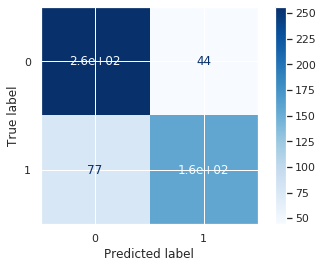

In [48]:
# Rodando Modelo
X = df_selected.drop(['Survived'], axis=1)
y = df_selected.Survived                       # Vetor de Labels (Variável dependente - classificacão)

run_model(X,y)

## Preparando os dados: Preencher idade com média por pronome de tratamento
#### Fluxo padrão

In [49]:
# Não dropa o Nome agora
df_selected = df.drop(['PassengerId','Cabin','Ticket','Fare', 'Parch', 'SibSp'], axis=1)

# encode "Sex"
from sklearn.preprocessing import LabelEncoder
labelEncoder_X = LabelEncoder()
df_selected.Sex=labelEncoder_X.fit_transform(df_selected.Sex)

# Remove NAN from Embarked
df_selected = df_selected.dropna(subset=['Embarked'])
df_selected['Embarked'].isna().sum()

# encode "Embarked"
df_selected.Embarked=labelEncoder_X.fit_transform(df_selected.Embarked)
df_selected.head()

df_selected.head()

,Survived,Pclass,Name,Sex,Age,Embarked
0,0,3,"Braund, Mr. Owen Harris",1,22.0,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,0
2,1,3,"Heikkinen, Miss. Laina",0,26.0,2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,2
4,0,3,"Allen, Mr. William Henry",1,35.0,2


In [50]:
print(sum(df_selected.Age.isnull()))

354


In [51]:
# Mean name code developed in part by RochelleSilve: https://www.kaggle.com/rochellesilva/simple-tutorial-for-beginners

# -------- Change Name -> Title ----------------------------
got = df_selected.Name.str.split(',').str[1]
got

0                                   Mr. Owen Harris
1        Mrs. John Bradley (Florence Briggs Thayer)
2                                       Miss. Laina
3                Mrs. Jacques Heath (Lily May Peel)
4                                 Mr. William Henry
                           ...                     
1777                                    Rev. Juozas
1778                           Miss. Margaret Edith
1779                 Miss. Catherine Helen "Carrie"
1780                                Mr. Karl Howell
1781                                    Mr. Patrick
Name: Name, Length: 1778, dtype: object

In [52]:
df_selected.iloc[:,2] = pd.DataFrame(got).Name.str.split('\s+').str[1]
df_selected

,Survived,Pclass,Name,Sex,Age,Embarked
0,0,3,Mr.,1,22.0,2
1,1,1,Mrs.,0,38.0,0
2,1,3,Miss.,0,26.0,2
3,1,1,Mrs.,0,35.0,2
4,0,3,Mr.,1,35.0,2
...,...,...,...,...,...,...
1777,0,2,Rev.,1,27.0,2
1778,1,1,Miss.,0,19.0,2
1779,0,3,Miss.,0,NaN,2
1780,1,1,Mr.,1,26.0,0


[['Don.',
  'Jonkheer.',
  'the',
  'Master.',
  'Miss.',
  'Mrs.',
  'Major.',
  'Mr.',
  'Col.',
  'Mme.',
  'Lady.',
  'Dr.',
  'Ms.',
  'Capt.',
  'Sir.',
  'Rev.',
  'Mlle.'],
 Name
 Capt.        70.000000
 Col.         58.000000
 Don.         40.000000
 Dr.          42.000000
 Jonkheer.    38.000000
 Lady.        48.000000
 Major.       48.500000
 Master.       4.574167
 Miss.        21.662069
 Mlle.        24.000000
 Mme.         24.000000
 Mr.          32.368090
 Mrs.         35.654206
 Ms.          28.000000
 Rev.         43.166667
 Sir.         49.000000
 the          33.000000
 Name: Age, dtype: float64]

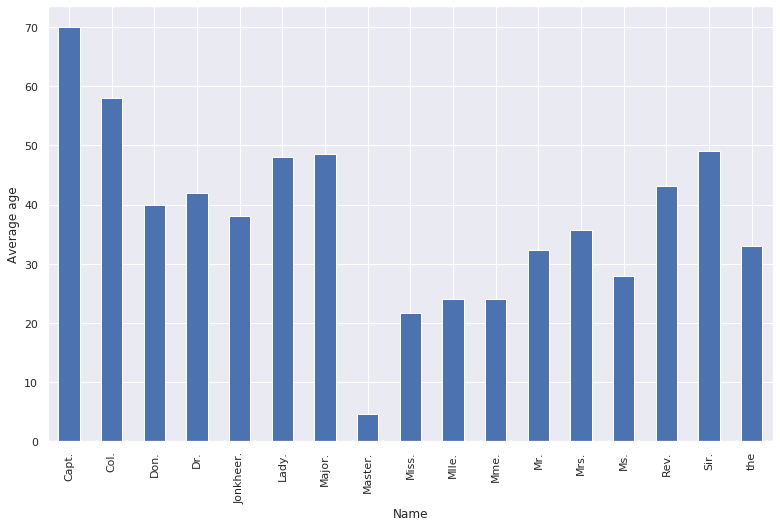

In [53]:
#------------------ Average Age per title -------------------------------------------------------------
ax = plt.subplot()
ax.set_ylabel('Average age')
df_selected.groupby('Name').mean()['Age'].plot(kind='bar',figsize=(13,8), ax = ax)

title_mean_age=[]
title_mean_age.append(list(set(df_selected.Name)))  #set for unique values of the title, and transform into list
title_mean_age.append(df_selected.groupby('Name').Age.mean())
title_mean_age
#------------------------------------------------------------------------------------------------------

In [54]:
current_title = "Mr." # Title Mr.
df_selected[df_selected.Name == current_title]

,Survived,Pclass,Name,Sex,Age,Embarked
0,0,3,Mr.,1,22.0,2
4,0,3,Mr.,1,35.0,2
5,0,3,Mr.,1,NaN,1
6,0,1,Mr.,1,54.0,2
12,0,3,Mr.,1,20.0,2
...,...,...,...,...,...,...
1772,0,3,Mr.,1,33.0,2
1774,0,2,Mr.,1,28.0,2
1775,0,3,Mr.,1,25.0,2
1780,1,1,Mr.,1,26.0,0


In [55]:
df_selected[df_selected.Name == current_title]["Age"].isna().sum()

238

In [56]:
#------------------ Fill the missing Ages ---------------------------
n_titles = len(title_mean_age[1])
for i in range(0, n_titles):
    current_title = title_mean_age[0][i]
    df_selected.update(df_selected[df_selected.Name == current_title].fillna(title_mean_age[1].loc[current_title])["Age"])
#--------------------------------------------------------------------
df_selected.head()

,Survived,Pclass,Name,Sex,Age,Embarked
0,0,3,Mr.,1,22.0,2
1,1,1,Mrs.,0,38.0,0
2,1,3,Miss.,0,26.0,2
3,1,1,Mrs.,0,35.0,2
4,0,3,Mr.,1,35.0,2


In [57]:
df_selected["Age"].isna().sum()

0

Training on:  1244  samples
Test on:  534  samples
------------

Test Accuracy score:  0.799625468164794
Classification report: 
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       326
           1       0.76      0.71      0.73       208

    accuracy                           0.80       534
   macro avg       0.79      0.78      0.79       534
weighted avg       0.80      0.80      0.80       534

------------



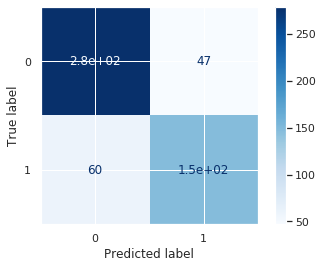

In [58]:
# Rodando Modelo
X = df_selected.drop(['Survived','Name'], axis=1)
y = df_selected.Survived                       # Vetor de Labels (Variável dependente - classificacão)

run_model(X,y)

## Conclusão

Métricas de acurácia e precisão não alteraram muito com os diferentes missing values da idade. Mas isto não é o fim do mundo. Poderíamos analisar também se o modelo está com menos overfit ou se as acurácias alterariam mais com outro modelo estatístico. Grande parte do trabalho é questionar e tentar.

Outras mudanças no dataset, como normalizar, balancear, discretizar, estratificar, etc. poderiam ter um maior impacto na mudança da acurácia.

Fiquem livres para brincar com o dataset e tentar!